In [46]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.preprocessing import MinMaxScaler 
from time import time
from math import sqrt
from sklearn.linear_model import Lasso
import matplotlib as plt
from matplotlib import pyplot
import plotly.offline as py
import plotly.graph_objs as go
#import warnings
#warnings.warn = warn
py.init_notebook_mode(connected=True)
%matplotlib inline
import seaborn as sb

# Test Set
test_data = pd.read_csv("C:\\Users\\dell\\Desktop\\Test_Data.csv")
test_data = test_data.drop(columns=["date","low","open","high","marketcap"])
test_data["Price"] = test_data["close"].shift(-1) # Dependent variable Y
print("n_features:", len(test_data.iloc[0]))
print("n_samples:", len(test_data))
test_data = test_data.iloc[:-1,1:]
test_data.tail()

n_features: 37
n_samples: 92


,volatility,volume,google_trends,gold,silver,platinum,palladium,oil,usd_eur,usd_jpy,...,est_TXN_vol,cost_per_TXN,total_TXN_fees,usd_trade_vol,hash_rate,avg_block_size,difficulty,num_unique_addr,miners_revenue,Price
86,0.034161,4726180000,61,1201.90,14.290,827.0,1065,73.40,1.1777,0.00905,...,503494967.4,52.112921,102965.2698,273203917.3,52622781.21,0.807114,7.152630e+12,469028,12385677.98,6495.00
87,0.028964,4437300000,59,1194.25,14.475,824.0,1059,72.22,1.1737,0.00904,...,842041019.0,54.247914,130284.3136,390313648.8,60089527.19,0.768241,7.152630e+12,490588,13676604.30,6676.75
88,0.037517,4606810000,58,1185.40,14.420,812.0,1067,72.18,1.1707,0.00905,...,748444892.4,46.610199,130238.5658,312748554.4,49422747.22,0.898005,7.152630e+12,474079,11369486.09,6644.13
89,0.027904,5014430000,58,1187.25,14.305,815.0,1094,73.16,1.1576,0.00906,...,824319235.8,47.597177,154586.9390,283381555.4,50844984.55,0.877031,7.152630e+12,481907,11836751.48,6601.96
90,0.019986,4363690000,48,1187.25,14.305,815.0,1094,73.16,1.1576,0.00902,...,913410388.9,51.317781,193097.0923,457654461.3,54756137.20,0.855169,7.152630e+12,527057,13046981.40,6625.56


In [47]:
# Actual Price 
Y_test = test_data.values[-90:,-1].reshape(-1,1) 
len(Y_test)

90

In [22]:
# Import Predictions
# Lasso example (need to change file name for other models)
'''CSVlist=['C:\\Users\\dell\\Desktop\\Y_pred/ARIMA.csv','C:\\Users\\dell\\Desktop\\Y_pred/BayesianRidge.csv','C:\\Users\\dell\\Desktop\\Y_pred/DecisionTree.csv']
for i in CSVlist:
    
    Y_pred = pd.read_csv(i).values
    len(Y_pred)
    sb.residplot(Y_test,Y_pred)'''

"CSVlist=['C:\\Users\\dell\\Desktop\\Y_pred/ARIMA.csv','C:\\Users\\dell\\Desktop\\Y_pred/BayesianRidge.csv','C:\\Users\\dell\\Desktop\\Y_pred/DecisionTree.csv']\nfor i in CSVlist:\n    \n    Y_pred = pd.read_csv(i).values\n    len(Y_pred)\n    sb.residplot(Y_test,Y_pred)"

ARIMA


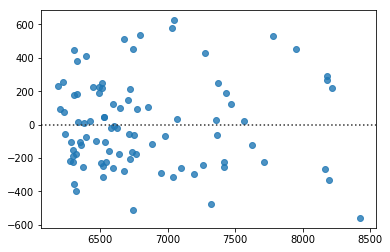

In [25]:
Y_pred = pd.read_csv('C:\\Users\\dell\\Desktop\\Y_pred/ARIMA.csv').values
print('ARIMA')
sb.residplot(Y_test,Y_pred)

BayesianRidge


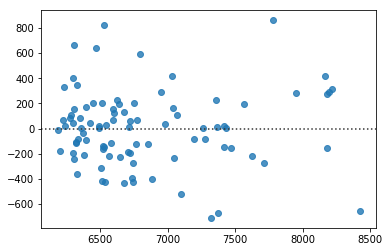

In [26]:
Y_pred = pd.read_csv('C:\\Users\\dell\\Desktop\\Y_pred/BayesianRidge.csv').values
print('BayesianRidge')
sb.residplot(Y_test,Y_pred)

DecisionTree


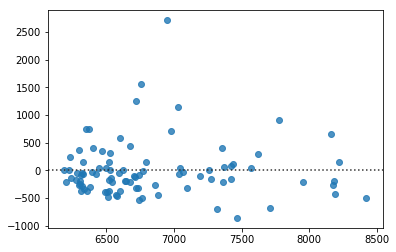

In [27]:
Y_pred = pd.read_csv('C:\\Users\\dell\\Desktop\\Y_pred/DecisionTree.csv').values
print('DecisionTree')
sb.residplot(Y_test,Y_pred)

ElasticNet


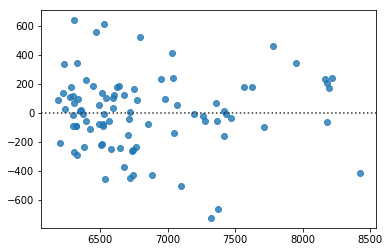

In [28]:
Y_pred = pd.read_csv('C:\\Users\\dell\\Desktop\\Y_pred/ElasticNet.csv').values
print('ElasticNet')
sb.residplot(Y_test,Y_pred)

ExtraTrees


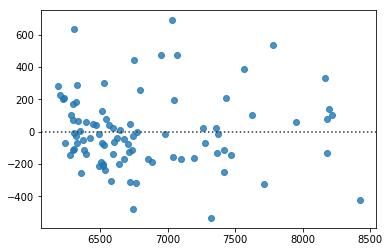

In [29]:
Y_pred = pd.read_csv('C:\\Users\\dell\\Desktop\\Y_pred/ExtraTrees.csv').values
print('ExtraTrees')
sb.residplot(Y_test,Y_pred)

KNN


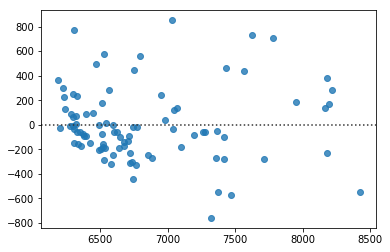

In [32]:
Y_pred = pd.read_csv('C:\\Users\\dell\\Desktop\\Y_pred/KNN.csv').values
print('KNN')
sb.residplot(Y_test,Y_pred)

Lasso


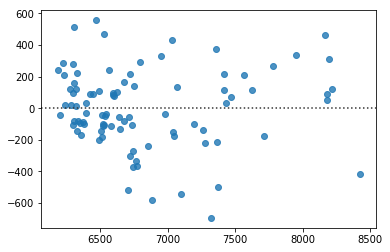

In [33]:
Y_pred = pd.read_csv('C:\\Users\\dell\\Desktop\\Y_pred/Lasso.csv').values
print('Lasso')
sb.residplot(Y_test,Y_pred)

LinearRegression


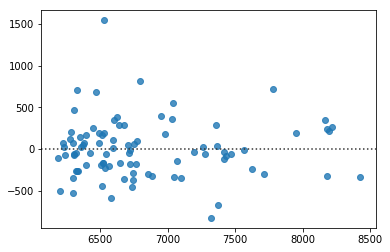

In [34]:
Y_pred = pd.read_csv('C:\\Users\\dell\\Desktop\\Y_pred/LinearRegression.csv').values
print('LinearRegression')
sb.residplot(Y_test,Y_pred)

LSTM


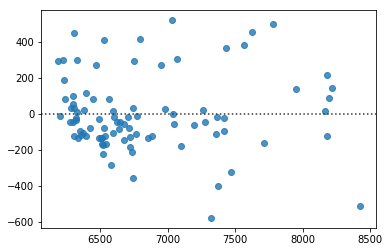

In [35]:
Y_pred = pd.read_csv('C:\\Users\\dell\\Desktop\\Y_pred/LSTM.csv').values
print('LSTM')
sb.residplot(Y_test,Y_pred)

Ridge


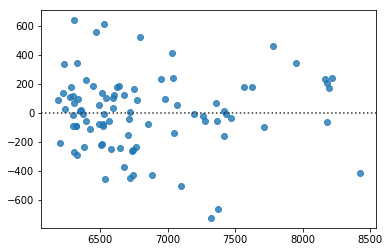

In [37]:
Y_pred = pd.read_csv('C:\\Users\\dell\\Desktop\\Y_pred/Ridge.csv').values
print('Ridge')
sb.residplot(Y_test,Y_pred)

SupportVetorRegression


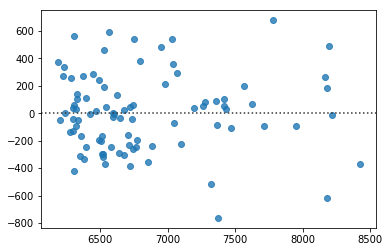

In [38]:
Y_pred = pd.read_csv('C:\\Users\\dell\\Desktop\\Y_pred/SupportVetorRegression.csv').values
print('SupportVetorRegression')
sb.residplot(Y_test,Y_pred)

XGBoost


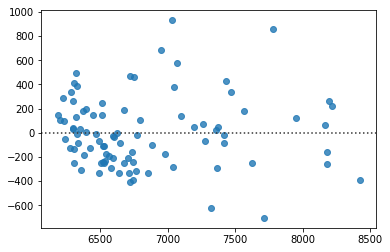

In [39]:
Y_pred = pd.read_csv('C:\\Users\\dell\\Desktop\\Y_pred/XGBoost.csv').values
print('XGBoost')
sb.residplot(Y_test,Y_pred)

GRU


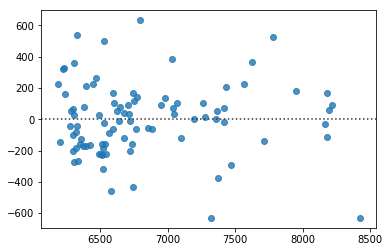

In [40]:
Y_pred = pd.read_csv('C:\\Users\\dell\\Desktop\\Y_pred/GRU.csv').values
print('GRU')
sb.residplot(Y_test,Y_pred)

MLP


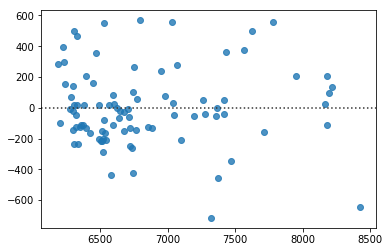

In [49]:
Y_pred = pd.read_csv('C:\\Users\\dell\\Desktop\\Y_pred/MLP.csv').values
print('MLP')
sb.residplot(Y_test,Y_pred)